# Titanic Challenge

Use a real data set from the Titanic passenger log to predict which passengers were most likely to survive the disaster.

## Overview
The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

The training set should be used to build the machine learning models. 

The test set should be used to see how well your model performs on unseen data. 
* use the model you trained to predict whether or not they survived the sinking of the Titanic.

gender_submission.csv - a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Import Libraries

In [123]:
import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dim object support

# do plotting inline instead of a separate window
%matplotlib inline

## Load and Review data

In [124]:
df = pd.read_csv("./data/train.csv")       # load training data

In [125]:
df.shape

(891, 12)

In [126]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [127]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


### Definition of features

| Variable | Definition | Key |
|----------|----------|----------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

- pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

# Check for null Values

In [128]:
df.isnull().values.any()

True

If the data has missing values, they will become NaNs in the Numpy arrays generated by the vectorizor so lets get rid of them

In [129]:
df.replace('?', 0)
df.fillna( 0, inplace = True )

In [130]:
def plot_corr(df, size=11):
    """
    Function Plots a graphical correlation matrix for each pair of columns in the dataframe.
    Imput:
        df: pandas DataFrame
        size: vertical and horizontal size of plot
        
    Dislays:
        matrix of corelation betewwn columns.
    """
    corr = df.corr()     # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)    # color code the rectangles by corelation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks


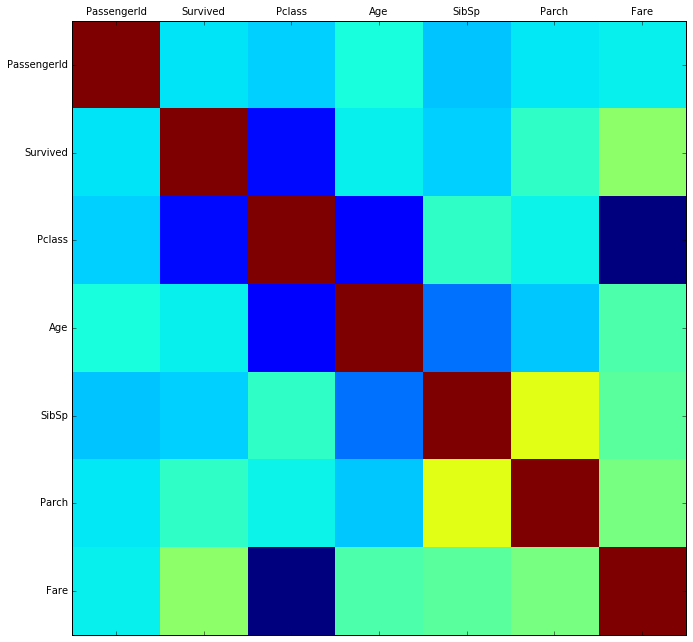

In [131]:
plot_corr(df)

In [132]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.038125,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


When corelation columns are found, it is advised that they are deleted

Delete Name field as it will not help with anything for prediction
Delete Cabin as only 19.6% of data is provided
Delete Ticket 

In [133]:
del df['Name']
del df['Cabin']
del df['Ticket']

In [134]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


# Molding Data
## Check Data Types

In [135]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


Change male to 1, female to 0

In [136]:
sex_map = { "male" : 1, "female" : 0}

In [137]:
df['Sex'] = df['Sex'].map(sex_map)

Embarked: 

C = Cherbourg, Q = Queenstown, S = Southampton

TODO: check if prediction is better when mapping the embarked to a number

In [138]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,S
1,2,1,1,0,38,1,0,71.2833,C
2,3,1,3,0,26,0,0,7.9250,S
3,4,1,1,0,35,1,0,53.1000,S
4,5,0,3,1,35,0,0,8.0500,S


Check true/false ration in Survived column

In [139]:
num_survived = len(df.loc[df['Survived'] == 1])
num_not_survived = len(df.loc[df['Survived'] == 0])
print("Number of people who survived:          {0}  ({1:2.2f}%)".format(num_survived,     (num_survived/     (num_survived+num_not_survived))*100))
print("Number of people who did not survived:  {0}  ({1:2.2f}%)".format(num_not_survived, (num_not_survived/ (num_survived+num_not_survived))*100))


Number of people who survived:          342  (38.38%)
Number of people who did not survived:  549  (61.62%)


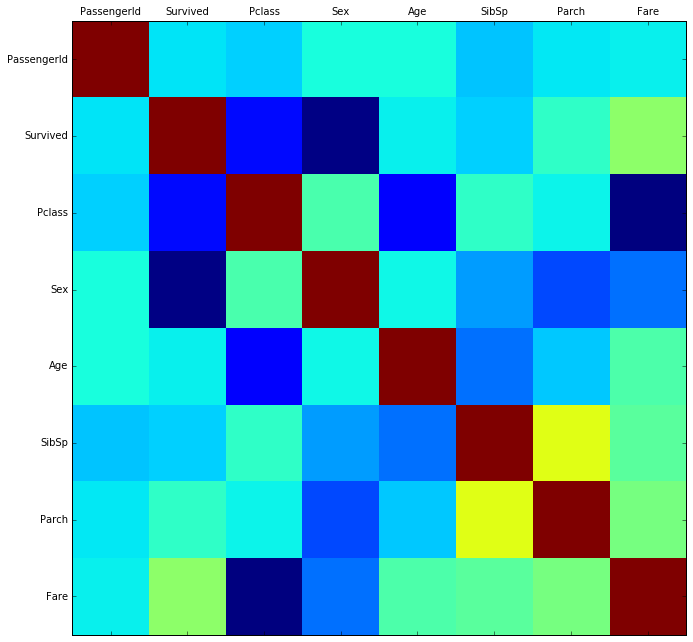

In [140]:
plot_corr(df)

In [141]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.361353,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.024978,-0.114631,-0.245489,-0.182333
Age,0.038125,0.010539,-0.361353,0.024978,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.135516,0.159651,0.216225,1.000000


#### Hidden Missing Values

Impute Age with the mean age 

In [142]:
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings in Age
imp = Imputer(missing_values=0, strategy="mean", axis=0)
df["Age"] = imp.fit_transform(df[["Age"]]).ravel()

### Splitting the data
70% testing, 30% training

In [143]:
from sklearn.cross_validation import train_test_split

feature_col_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
predicted_class_name = ["Survived"]

x = df[feature_col_names].values          # predictor feature columns (6 x m)
y = df[predicted_class_name].values       # predicted class (1 = true, 0 = false) comumn (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
                # test_size = 0.3 is 30%, 42 is the answer to everything (seed for splitting)

Check to ensure we have the desired 70% train, 30% test split of the data

In [144]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


In [145]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 1]), (len(df.loc[df['Survived'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 0]), (len(df.loc[df['Survived'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 342 (38.38%)
Original False : 549 (61.62%)

Training True  : 231 (37.08%)
Training False : 392 (62.92%)

Test True      : 111 (41.42%)
Test False     : 157 (58.58%)


# Post-split Data Preparation

#### Hidden Missing Values

In [146]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,S
1,2,1,1,0,38.000000,1,0,71.2833,C
2,3,1,3,0,26.000000,0,0,7.9250,S
3,4,1,1,0,35.000000,1,0,53.1000,S
4,5,0,3,1,35.000000,0,0,8.0500,S
5,6,0,3,1,29.699118,0,0,8.4583,Q
6,7,0,1,1,54.000000,0,0,51.8625,S
7,8,0,3,1,2.000000,3,1,21.0750,S
8,9,1,3,0,27.000000,0,2,11.1333,S
9,10,1,2,0,14.000000,1,0,30.0708,C


In [147]:
print("# rws in dataframe {0}".format(len(df)))
print("# rows missing Age: {0}".format(len(df.loc[df['Age'] == 0]))) # not missing anymore
print("# rows missing Pclass: {0}".format(len(df.loc[df['Pclass'] == 0])))
print("# rows missing Fare: {0}".format(len(df.loc[df['Fare'] == 0]))) # ignore, only 15 entries

# rws in dataframe 891
# rows missing Age: 0
# rows missing Pclass: 0
# rows missing Fare: 15


# Training Initial Algorithm - Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB

# create Gausian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance on Training Data

In [150]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the preformance metrics library
from sklearn import metrics

# Acuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7945



### Performance on Testing Data

In [153]:
# predict values using the training data
nb_predict_test = nb_model.predict(x_test)

# Acuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7910



#### Metrics

In [154]:
print("Confusin Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusin Matrix
[[130  27]
 [ 29  82]]

Classification Report
             precision    recall  f1-score   support

          0       0.82      0.83      0.82       157
          1       0.75      0.74      0.75       111

avg / total       0.79      0.79      0.79       268



# Random Forest
The difference between train data prediction and test data prediction is too big -> model trained too well

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)    # create random forest object
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Predict Training data

In [156]:
rf_predict_train = rf_model.predict(x_train)
# training accuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9631


#### Predict Test data

In [157]:
rf_predict_test = rf_model.predict(x_test)
# training accuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7649


In [158]:
print("Confusin Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusin Matrix
[[132  25]
 [ 38  73]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.84      0.81       157
          1       0.74      0.66      0.70       111

avg / total       0.76      0.76      0.76       268



# Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("Confusin Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.8060
Confusin Matrix
[[138  19]
 [ 33  78]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       157
          1       0.80      0.70      0.75       111

avg / total       0.81      0.81      0.80       268



#### Setting Regularization parameter

1st max value of 0.712 occured at C=5.000


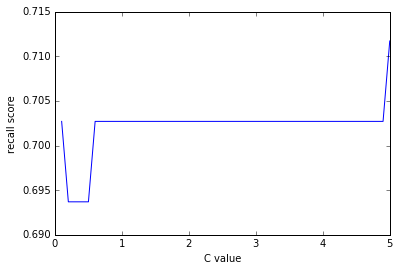

In [165]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start

best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### Logistic Regression with class_weight='balanced'

1st max value of 0.811 occured at C=3.500


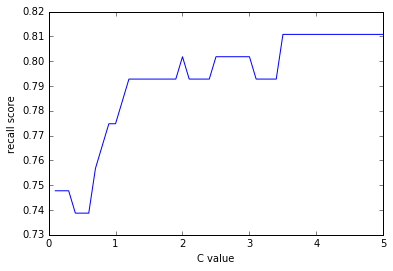

In [166]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start

best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [169]:
#from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("Confusin Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print("{0:0.4f}".format(metrics.recall_score(y_test, lr_predict_test)))

Accuracy: 0.8134
Confusin Matrix
[[128  29]
 [ 21  90]]

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       157
          1       0.76      0.81      0.78       111

avg / total       0.82      0.81      0.81       268

0.8108


## Logistic RegressionCV - Cross Validation

In [171]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

#### Predict Test data

In [172]:
lr_cv_predict_test = lr_cv_model.predict(x_test)
# training accuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("Confusin Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))
print("{0:0.4f}".format(metrics.recall_score(y_test, lr_cv_predict_test)))

Accuracy: 0.8134
Confusin Matrix
[[127  30]
 [ 20  91]]

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.81      0.84       157
          1       0.75      0.82      0.78       111

avg / total       0.82      0.81      0.81       268

0.8198


# Predictions to the test data 
Use data from test.csv file

In [173]:
test_df = pd.read_csv("./data/test.csv")       # load test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Clean test data

In [174]:
test_df.replace('?', 0)
test_df.fillna( 0, inplace = True )

del test_df['Name']
del test_df['Cabin']
del test_df['Ticket']

test_df['Sex'] = test_df['Sex'].map(sex_map)

# Impute with mean all 0 readings in Age
test_df["Age"] = imp.fit_transform(test_df[["Age"]]).ravel()

print("# rws in dataframe {0}".format(len(test_df)))
print("# rows missing Age: {0}".format(len(test_df.loc[df['Age'] == 0]))) # not missing anymore
print("# rows missing Pclass: {0}".format(len(test_df.loc[df['Pclass'] == 0])))
print("# rows missing Fare: {0}".format(len(test_df.loc[df['Fare'] == 0]))) 
test_df.head()

# rws in dataframe 418
# rows missing Age: 0
# rows missing Pclass: 0
# rows missing Fare: 6


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


In [175]:
#get queries IDs for later usage
queryIds = test_df['PassengerId']

In [181]:
x = test_df[feature_col_names].values

predictions = lr_cv_model.predict(x)

In [196]:
#-------------------------------------------
# Print predictions to file
#-------------------------------------------

# open file to write Predictions
predictionFile = open('./solutions/prediction.csv', 'w')
predictionFile.write("PassengerId,Survived\n")

for qId, prediction in zip(queryIds, predictions):
    #print("{0}, {1}".format(qId, prediction))
    predictionFile.write("{0}, {1}\n".format(qId, prediction))